In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fc_data.csv')

In [4]:
df_copy = df.copy()


In [6]:
df_copy['format'].value_counts().head()

올인원        87402
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
Name: format, dtype: int64

<AxesSubplot:xlabel='category_title', ylabel='Count'>

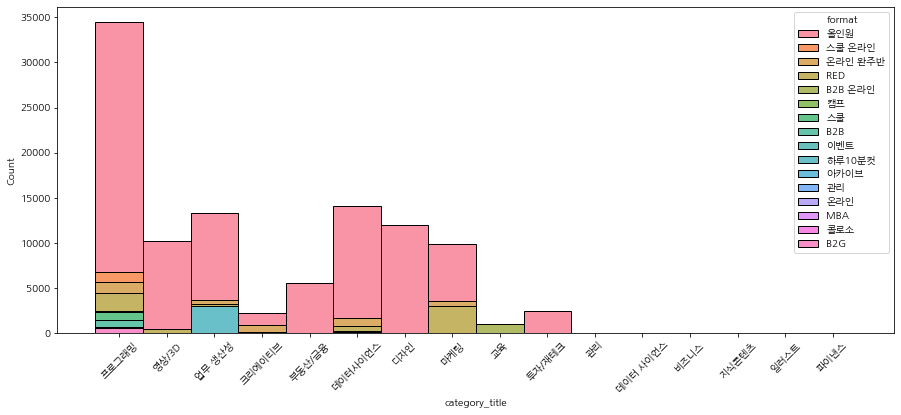

In [7]:
# 카테고리 내 강의 기획 별 개수
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.histplot(data=df_copy, x='category_title', hue = 'format', multiple='stack')

In [77]:
# 공개 x 인 값 제거
df_copy = df_copy[df_copy['state'] != 'CANCELLED']
df_copy = df_copy[df_copy['state'] != 'PENDING']
df_copy = df_copy[df_copy['state'] != 'DELETED']
df_copy = df_copy[df_copy['type'] != 'ORDER']
df_copy = df_copy[df_copy['type'] != 'TRANSACTION']

In [13]:
df_copy = df_copy.drop(['tax_free_amount'], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      56738 non-null  int64  
 1   customer_id             56738 non-null  float64
 2   course_id               54582 non-null  float64
 3   type                    56738 non-null  object 
 4   state                   56738 non-null  object 
 5   course_title            56737 non-null  object 
 6   category_title          56734 non-null  object 
 7   format                  56737 non-null  object 
 8   completed_at            56738 non-null  object 
 9   transaction_amount      56738 non-null  int64  
 10  coupon_title            23763 non-null  object 
 11  coupon_discount_amount  23763 non-null  float64
 12  sale_price              55658 non-null  float64
 13  pg                      46387 non-null  object 
 14  method                  56734 non-nul

In [14]:
df_copy['course_id'].isnull().sum()

2156

In [15]:
# nan 값 채우기
df_copy['course_id'].replace(np.nan, 111111, inplace=True)

In [5]:
# 올인원 
df_all = df_copy[df_copy['format']=='올인원']

In [6]:
# 프로그래밍 
df_pro = df_copy[df_copy['category_title'] == '프로그래밍']

<AxesSubplot:xlabel='subcategory_title', ylabel='count'>

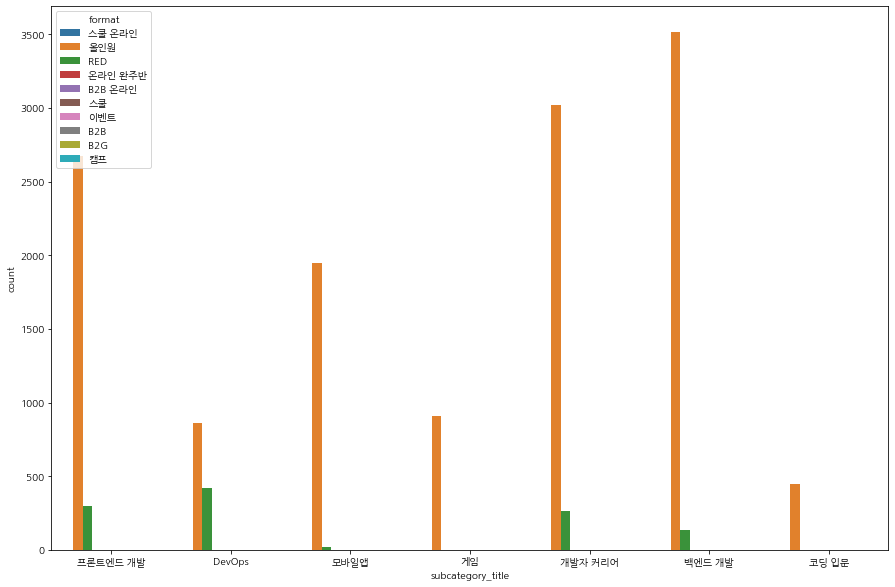

In [19]:
# 프로그래밍 강의 내 subcategory 시각화
plt.figure(figsize=(15,10))
sns.countplot(data=df_pro, x='subcategory_title', hue = 'format')

## 프로그래밍에서도 백엔드와 개발자 커리어, 프론트엔드가 많은 것을 알 수 있음.
### RED 강의는 DevOps가 가장 많음
- 백엔드 개발쪽에서는 RED 강의가 상대적으로 부족함

In [7]:
df_copy['marketing_start_at'] = pd.to_datetime(df_copy['marketing_start_at'])


In [8]:
df_copy['completed_at'] = pd.to_datetime(df_copy['completed_at'])

- datetime으로 만듬

### 환불 확인

In [25]:
df_copy['type'].value_counts()

PAYMENT    52916
REFUND      3822
Name: type, dtype: int64

In [9]:
df_refund = df_copy[df_copy['type']=='REFUND']

<AxesSubplot:xlabel='category_title', ylabel='count'>

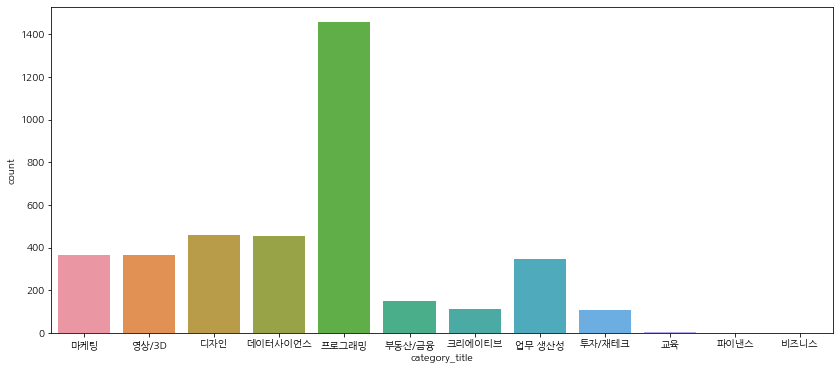

In [27]:
# 카테고리 별 환불 개수 시각화
plt.figure(figsize=(14,6))
sns.countplot(data=df_refund, x='category_title')

In [28]:
df_refund.groupby('category_title').size().sort_values(ascending=False)

category_title
프로그래밍      1455
디자인         459
데이터사이언스     453
영상/3D       366
마케팅         365
업무 생산성      345
부동산/금융      148
크리에이티브      114
투자/재테크      107
교육            5
비즈니스          2
파이낸스          2
dtype: int64

- 프로그래밍이 가장 많은 것을 확인 

### 환불을 세부적으로 확인

In [29]:
df_refund.groupby(['type', 'category_title','subcategory_title', 'format']).count().sort_values(by = 'id', ascending = False)

id  customer_id  course_id  \
type   category_title subcategory_title format                                
REFUND 프로그래밍          백엔드 개발            올인원     256          256        256   
       영상/3D          영상 편집             올인원     233          233        233   
       프로그래밍          프론트엔드 개발          올인원     219          219        219   
                      개발자 커리어           올인원     180          180        180   
                      모바일앱              올인원     164          164        164   
       디자인            일러스트              올인원     153          153        153   
                      디자인툴              올인원     133          133        133   
       데이터사이언스        데이터분석             올인원     124          124        124   
       업무 생산성         PPT/보고서           올인원     123          123        123   
       디자인            UX/UI             올인원     112          112        112   
       데이터사이언스        딥러닝/인공지능          올인원     111          111        111   
       업무 생산성         엑셀/VBA            올인원     104          104        104   
       투자/재테크         주식 투자             올인원      88           88         88   
       마케팅            데이터마케팅            올인원      78           78         78   
                      글쓰기/카피라이팅         RED      76           76         76   
       영상/3D          모션그래픽             올인원      71           71         71   
       데이터사이언스        머신러닝              올인원      70           70         70   
       디자인            시각디자인             올인원      58           58         58   
       마케팅            디지털마케팅            올인원      54           54         54   
       부동산/금융         금융/투자 실무          올인원      53           53         53   
       마케팅            SNS마케팅            올인원      51           51         51   
       프로그래밍          게임                올인원      51           51         51   
                      DevOps            올인원      47           47         47   
       부동산/금융         회계/재무/세무          올인원      44           44         44   
                      부동산 개발            올인원      42           42         42   
       프로그래밍          코딩 입문             올인원      30           30         30   
                      DevOps            RED      29           29         29   
       업무 생산성         업무자동화             올인원      27           27         27   
       영상/3D          게임 그래픽            올인원      23           23         23   
                      VFX               올인원      23           23         23   
       마케팅            글쓰기/카피라이팅         올인원      22           22         22   
       투자/재테크         부동산 투자            올인원      19           19         19   
       프로그래밍          프론트엔드 개발          RED      14           14         14   
       데이터사이언스        딥러닝/인공지능          RED      11           11         11   
       영상/3D          영상 편집             RED      10           10         10   
       업무 생산성         리더십               올인원       9            9          9   
       데이터사이언스        데이터엔지니어링          RED       8            8          8   
       업무 생산성         커뮤니케이션            올인원       6            6          6   
       영상/3D          VFX               RED       5            5          5   
       프로그래밍          개발자 커리어           RED       5            5          5   
                      백엔드 개발            RED       5            5          5   
       데이터사이언스        데이터엔지니어링          올인원       4            4          4   
       업무 생산성         리더십               RED       3            3          3   
       데이터사이언스        데이터분석             캠프        3            3          3   
       프로그래밍          모바일앱              RED       1            1          1   
       데이터사이언스        데이터분석             RED       1            1          1   

                                                state  course_title  \
type   category_title subcategory_title format                        
REFUND 프로그래밍          백엔드 개발            올인원       256           256   
       영상/3D          영상 편집             올인원

- 영상/3D 같은 경우 영상 편집의 환불이 주를 이루고 있음.( 강의의 질을 올려야 할듯)
- 대체적으로 올인원이 가장 많은 것을 확인할 수 있음

## 어느 고객군에서 구매가 가장 많이 이루어졌는가?


### 개인 확인 ( '올인원', 'RED', '온라인 완주반', '하루10분컷', '이벤트', '아카이브', '캠프', 'MBA', '관리', '온라인')

In [31]:
df_per = df_copy[df_copy['format'].isin(['올인원', 'RED', '온라인 완주반', '하루10분컷', '이벤트', '아카이브', '캠프', 'MBA', '관리', '온라인'])]
df_per

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
18,970682,478031.0,111111.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [32]:
# 필요없는 값 제외
df_per = df_per.iloc[:,:10]
df_per.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000
18,970682,478031.0,111111.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000


In [33]:
df_per['state'].value_counts()

COMPLETED    53141
REQUESTED       14
Name: state, dtype: int64

In [34]:
# df_pp = df_per[(df_per['state'] == 'CANCELLED') | (df_per['state'] == 'PENDING') | (df_per['state'] =='DELETED')].index
# df_sam = df_per.drop(df_pp)

- CANCELLED, PENDING, DELETED은 보안 이슈로 삭제

In [36]:
# 강의 총 값
df_per['transaction_amount'].sum()

5956445962

In [37]:
df_per['type'].value_counts()

PAYMENT    49565
REFUND      3590
Name: type, dtype: int64

In [38]:
df_group = df_per.groupby('format')['transaction_amount'].sum().sort_values(ascending=False)

In [39]:
# format 별 결제 총 값
df_tra = pd.DataFrame(df_group)
df_tra

,transaction_amount
format,
올인원,5000345033
RED,481432363
온라인 완주반,417656060
하루10분컷,26726306
캠프,19071500
MBA,4970000
이벤트,4398000
아카이브,1895700
관리,150000


In [55]:
5000345033 / 5956445962

0.8394846633211175

- format별 매출액
- 올인원이 84%로 가장 많은 것을 알 수 있음

In [41]:
df_1 = df_per['format'].value_counts()
df_1

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

In [42]:
pd.options.display.float_format = '{:.0f}'.format
df_mean = pd.DataFrame((df_group / df_1).sort_values(ascending=False))
df_mean

,0
캠프,762860
온라인 완주반,249645
MBA,216087
관리,150000
RED,142309
올인원,107410
아카이브,54163
이벤트,49416
하루10분컷,19494
온라인,-199000


- 총 매출액 / 팔린 강의 수 

### 기업 확인 ( 'B2B', 'B2B 온라인')


In [79]:
df_b2b = df_copy[df_copy['format'].isin(['B2B', 'B2B 온라인'])]
df_b2b.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
631,972364,478743.00,204039.00,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
633,972365,478745.00,203352.00,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
1035,973331,479082.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,NaN,NaN,600000.00,600000.00,NaN,CARD,NaN,NaN
1046,973363,474327.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,NaN,NaN,600000.00,600000.00,NaN,CARD,NaN,NaN
1135,973592,479185.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,NaN,NaN,600000.00,600000.00,NaN,CARD,NaN,NaN


In [80]:
# 기업 결제 총 금액 (19억)
df_b2b['transaction_amount'].sum()

1981496109

- 필요없는 값들 제거

In [81]:
df_b2b = df_b2b.drop(['coupon_title', 'coupon_discount_amount', 'subcategory_title', 'marketing_start_at'],
               axis = 1)
df_b2b.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,sale_price,tax_free_amount,pg,method
631,972364,478743.00,204039.00,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000,NaN,NaN,NaN,TRANSFER
633,972365,478745.00,203352.00,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000,NaN,NaN,NaN,TRANSFER
1035,973331,479082.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,600000.00,600000.00,NaN,CARD
1046,973363,474327.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,600000.00,600000.00,NaN,CARD
1135,973592,479185.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,600000.00,600000.00,NaN,CARD


In [91]:
df_b2b = df_b2b.iloc[:,:10]
df_b2b

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
631,972364,478743.00,204039.00,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000
633,972365,478745.00,203352.00,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000
1035,973331,479082.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000
1046,973363,474327.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000
1135,973592,479185.00,204387.00,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000
...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386.00,207667.00,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000
104832,1361312,669400.00,207555.00,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000
104905,1367252,672301.00,207714.00,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000
105163,1367258,672307.00,207731.00,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000


In [82]:
df_b2b['state'].value_counts()

COMPLETED    1469
Name: state, dtype: int64

<AxesSubplot:xlabel='category_title', ylabel='count'>

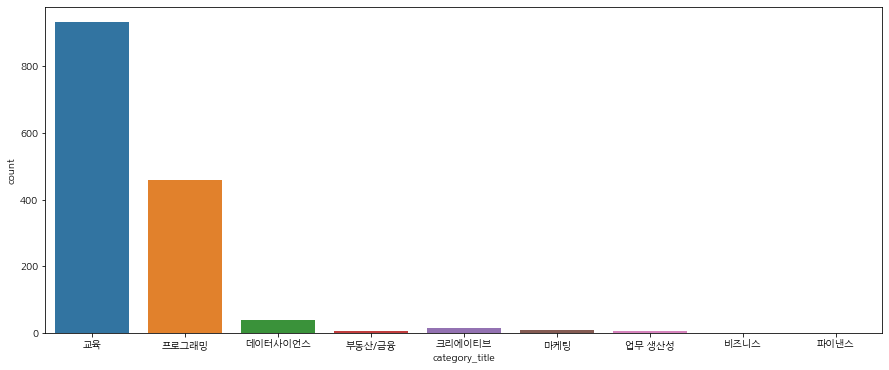

In [83]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_b2b, x='category_title')

#### 카테고리별 평균 값

In [85]:
pd.options.display.float_format = '{:.2f}'.format
df_b2b.groupby('category_title')['transaction_amount'].mean().sort_values(ascending=False)

category_title
마케팅       14109166.67
데이터사이언스   13546988.85
크리에이티브     4204900.00
업무 생산성     3750916.67
교육         1244984.49
파이낸스        480000.00
부동산/금융      435500.00
비즈니스        360000.00
프로그래밍       138504.37
Name: transaction_amount, dtype: float64

In [86]:
# df_b2b['transaction_amount'].value_counts().sort_values(ascending=False)
# pd.options.display.float_format = '{:.2f}'.format # 소수 둘째짜리까지 표시
df_b2b['transaction_amount'][df_b2b['category_title']=='마케팅'].describe()

count           9.00
mean     14109166.67
std      37338897.03
min        360000.00
25%        480000.00
50%        480000.00
75%       1822500.00
max     113400000.00
Name: transaction_amount, dtype: float64

In [87]:
df_b2b['transaction_amount'][df_b2b['category_title']=='데이터사이언스'].describe()

count         40.00
mean    13546988.85
std     17825923.19
min       120000.00
25%      1619062.50
50%      8700000.00
75%     15373500.00
max     81040000.00
Name: transaction_amount, dtype: float64

In [88]:
df_b2b['transaction_amount'][df_b2b['category_title']=='교육'].describe()

count        932.00
mean     1244984.49
std      1920268.35
min      -600000.00
25%       600000.00
50%       600000.00
75%      1800000.00
max     19953975.00
Name: transaction_amount, dtype: float64

In [89]:
df_b2b['transaction_amount'][df_b2b['category_title']=='크리에이티브'].describe()

count         15.00
mean     4204900.00
std     11273986.12
min      -480000.00
25%       480000.00
50%       480000.00
75%      2535000.00
max     44600000.00
Name: transaction_amount, dtype: float64

In [90]:
df_b2b['transaction_amount'][df_b2b['category_title']=='프로그래밍'].describe()

count        460.00
mean      138504.37
std      1214179.23
min     -1800000.00
25%        20000.00
50%        30000.00
75%        40000.00
max     19503000.00
Name: transaction_amount, dtype: float64

### 정부 확인 (B2G)

In [129]:
df_b2g = df_copy[df_copy['format'].isin(['B2G'])]
df_b2g.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
76521,1228790,467567.00,205419.00,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290,NaN,NaN,859290.00,859290.00,INICIS,CARD,NaN,NaN
84609,1267969,623766.00,206746.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 7:36:20,20000,NaN,NaN,20000.00,20000.00,KAKAO,CARD,NaN,NaN
84683,1268320,623766.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 11:58:30,30000,NaN,NaN,30000.00,30000.00,KAKAO,CARD,NaN,NaN
84732,1268687,622246.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000,NaN,NaN,30000.00,30000.00,INICIS,CARD,NaN,NaN
84781,1268954,624318.00,206843.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-08-06 17:04:22,40000,NaN,NaN,40000.00,40000.00,INICIS,CARD,NaN,NaN


In [130]:
df_b2g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 76521 to 105405
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      434 non-null    int64  
 1   customer_id             434 non-null    float64
 2   course_id               434 non-null    float64
 3   type                    434 non-null    object 
 4   state                   434 non-null    object 
 5   course_title            434 non-null    object 
 6   category_title          434 non-null    object 
 7   format                  434 non-null    object 
 8   completed_at            434 non-null    object 
 9   transaction_amount      434 non-null    int64  
 10  coupon_title            38 non-null     object 
 11  coupon_discount_amount  38 non-null     float64
 12  sale_price              433 non-null    float64
 13  tax_free_amount         433 non-null    float64
 14  pg                      395 non-nul

In [131]:
df_b2g = df_b2g.iloc[:,:10]
df_b2g.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
76521,1228790,467567.00,205419.00,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290
84609,1267969,623766.00,206746.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 7:36:20,20000
84683,1268320,623766.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 11:58:30,30000
84732,1268687,622246.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000
84781,1268954,624318.00,206843.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-08-06 17:04:22,40000


In [118]:
df_b2g['category_title'].value_counts()

프로그래밍    433
마케팅        1
Name: category_title, dtype: int64

In [119]:
df_b2g['transaction_amount'][df_b2g['category_title']=='프로그래밍'].describe()

count       433.00
mean      20603.46
std       55301.35
min     -130000.00
25%           0.00
50%       30000.00
75%       30000.00
max      859290.00
Name: transaction_amount, dtype: float64

In [124]:
df_b2g['transaction_amount'][df_b2g['category_title']=='마케팅'].describe()

count          1.00
mean    20000000.00
std             NaN
min     20000000.00
25%     20000000.00
50%     20000000.00
75%     20000000.00
max     20000000.00
Name: transaction_amount, dtype: float64

### 정부는 프로그래밍을 위주로 판매가 됨 ( 그 외 다른 값은 마케팅 1개 뿐)

### CLC 확인 (스쿨, 스쿨 온라인, 콜로소)

In [10]:
df_clc = df_copy[df_copy['format'].isin(['스쿨', '스쿨 온라인', '콜로소'])]

In [11]:
df_clc = df_clc.iloc[:,:10]

In [14]:
df_clc['category_title'].value_counts()

프로그래밍      2009
데이터사이언스      79
크리에이티브        6
일러스트          1
Name: category_title, dtype: int64

In [19]:
# 카테고리별 총 판매 값
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(df_clc.groupby('category_title')['transaction_amount'].sum().sort_values(ascending=False))

,transaction_amount
category_title,
프로그래밍,80496846
데이터사이언스,14608693
일러스트,208000
크리에이티브,-2711833


In [20]:
# 평균 판매 값
pd.DataFrame(df_clc.groupby('category_title')['transaction_amount'].mean().sort_values(ascending=False))

,transaction_amount
category_title,
일러스트,208000.00
데이터사이언스,184920.16
프로그래밍,40068.12
크리에이티브,-451972.17
